In [ ]:
#Rui Sun HW#7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Credit Card Default Dataset
dataset = pd.read_excel(r'/Users/rsun2/Downloads/DataDefault.xlsx') # this is for MAC

In [3]:
dataset.head(5)

,AGE,INCOME,DEFAULT
0,42.416668,11.666667,0
1,42.000000,12.500000,0
2,40.583332,13.000000,0
3,44.333332,13.250000,0
4,38.666668,13.485000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      154 non-null    float64
 1   INCOME   154 non-null    float64
 2   DEFAULT  154 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.7 KB


In [5]:
dataset.describe()

,AGE,INCOME,DEFAULT
count,154.000000,154.000000,154.000000
mean,32.938853,21.451374,0.603896
std,6.497870,6.275266,0.490682
min,20.083334,9.986667,0.000000
25%,28.270834,16.666667,0.000000
50%,32.791666,20.291667,1.000000
75%,37.166668,26.666667,1.000000
max,48.166668,33.333333,1.000000


In [71]:
# Observing Correlation between features of the Dataset
correlation = dataset.corr()

<AxesSubplot:>

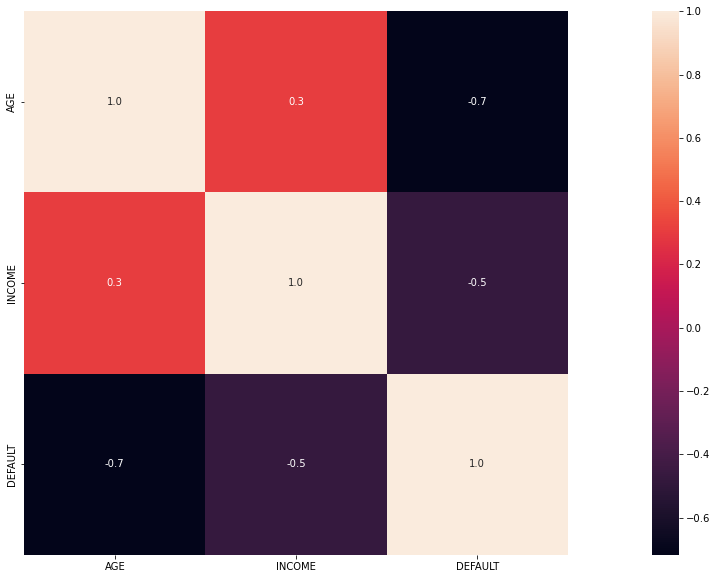

In [72]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )  

In [57]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.

The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

In [66]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
# apply the linear kernel
scv = SVC(kernel = 'linear', random_state = 0)
scv.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [67]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

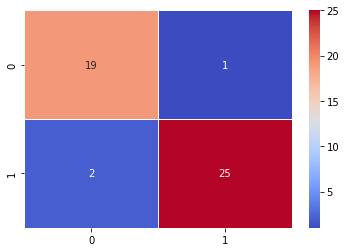

In [69]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [70]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.93617,0.961538,0.925926,0.943396,0.937963


In [58]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
# apply with the rbf kernel
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

In [59]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

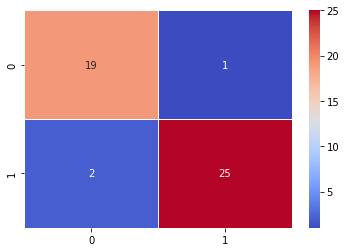

In [61]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [62]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.93617,0.961538,0.925926,0.943396,0.937963


### Q2
There is a better way that I know to get your parameters right, which is to use GridSearchCV. Essentially we give a parameters space and test our model on every point of this space, returning the ideal combination of parameters.

In [77]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

In [78]:
scv_params = [{'C':[0.001,0.01,0.1,1,10,1000],'kernel':['linear']},
               {'C':[0.001,0.01,0.1,1,10,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.0001]}]

In [79]:
grid_search_1 = GridSearchCV(estimator=scv,param_grid=scv_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_1 = grid_search_1.fit(X_train,y_train)

In [80]:
best_accuracy_1 = grid_search_1.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.9073593073593074


In [81]:
best_parameters = grid_search_1.best_params_
best_parameters

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [82]:
y_pred_svc =grid_search_1.predict(X_test)

In [85]:
roc=roc_auc_score(y_test, y_pred_svc)
acc = accuracy_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
model =  pd.DataFrame([['SVC MODEL TUNED', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.914894,0.925926,0.925926,0.925926,0.912963
1,SVC MODEL TUNED,0.914894,0.925926,0.925926,0.925926,0.912963


In [84]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.914894,0.925926,0.925926,0.925926,0.912963


References
https://github.com/KaushikJais/Credit-CardDefault/blob/master/Credit%20Card%20Default%20(Final%20Submission)%20(1).ipynb

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

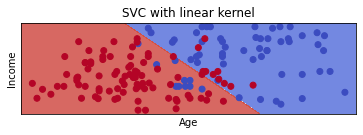

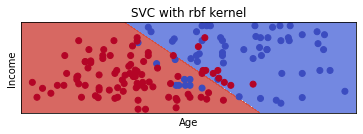

In [40]:
# Importing the Credit Card Default Dataset
dataset = pd.read_excel(r'/Users/rsun2/Downloads/DataDefault.xlsx') # this is for MAC
# import some data to play with
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
# create a mesh to plot in

C = 1.0 # SVM regularization parameter

linear_svc = svm.SVC(kernel = 'linear', C = C).fit(X, y)
rbf_svc = svm.SVC(kernel = 'rbf', gamma = 0.7, C = C).fit(X, y)


h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with rbf kernel']


for i, clf in enumerate((linear_svc, rbf_svc)):
#Plot the decision boundary. For that, we will assign a color to each
#point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 1, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Age')
    plt.ylabel('Income')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

    plt.show()